In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model

In [2]:
!pip install numpy

In [3]:
!pip install matplotlib

In [4]:
df=pd.read_csv(r'C:\Users\gunja\Downloads\usedcar.csv')

In [5]:
df

,car_name,car_price_in_rupees,kms_driven,fuel_type,city,year_of_manufacture
0,Hyundai Grand i10 Magna 1.2 Kappa VTVT [2017-2...,₹ 4.45 Lakh,"22,402 km",Petrol,Mumbai,2016
1,Maruti Suzuki Alto 800 Lxi,₹ 2.93 Lakh,"10,344 km",Petrol,Kolkata,2019
2,Tata Safari XZ Plus New,₹ 22.49 Lakh,"12,999 km",Diesel,Bangalore,2021
3,Maruti Suzuki Ciaz ZXI+,₹ 6.95 Lakh,"45,000 km",Petrol,Thane,2016
4,Jeep Compass Sport Plus 1.4 Petrol [2019-2020],₹ 12 Lakh,"11,193 km",Petrol,Kolkata,2019
...,...,...,...,...,...,...
2100,Ford Figo Titanium1.5 TDCi,₹ 3.6 Lakh,"42,158 km",Diesel,Kolkata,2015
2101,MINI Cooper Countryman Cooper D,₹ 22 Lakh,"68,862 km",Diesel,Hyderabad,2013
2102,Hyundai Verna 1.6 VTVT SX,₹ 8.38 Lakh,"37,622 km",Petrol,Chennai,2018
2103,Maruti Suzuki Ciaz VXi+ AT,₹ 6.75 Lakh,"64,726 km",Petrol,Mumbai,2017


In [6]:
df.columns

Index(['car_name', 'car_price_in_rupees', 'kms_driven', 'fuel_type', 'city',
       'year_of_manufacture'],
      dtype='object')

In [7]:
df.isnull().sum()

car_name               0
car_price_in_rupees    0
kms_driven             0
fuel_type              0
city                   0
year_of_manufacture    0
dtype: int64

In [8]:
df.describe()

,year_of_manufacture
count,2105.000000
mean,2017.022803
std,2.818066
min,2004.000000
25%,2015.000000
50%,2017.000000
75%,2019.000000
max,2022.000000


In [9]:
def convert_to_float(column):
    # Remove '$', 'lakh', and leading/trailing whitespaces, then convert to float
    column= column.str.replace('₹', '').str.replace('Lakh', '').str.replace('Crore', '').str.replace(',','').str.strip().astype(float)
    return column.astype(float).apply(lambda x: int(x * 100000) if 'lakh' in column else int(x * 10000000))
# Apply the function to the 'Price' column
df['car_price_in_rupees'] = convert_to_float(df['car_price_in_rupees']).astype(int)


In [10]:
df


,car_name,car_price_in_rupees,kms_driven,fuel_type,city,year_of_manufacture
0,Hyundai Grand i10 Magna 1.2 Kappa VTVT [2017-2...,44500000,"22,402 km",Petrol,Mumbai,2016
1,Maruti Suzuki Alto 800 Lxi,29300000,"10,344 km",Petrol,Kolkata,2019
2,Tata Safari XZ Plus New,224899999,"12,999 km",Diesel,Bangalore,2021
3,Maruti Suzuki Ciaz ZXI+,69500000,"45,000 km",Petrol,Thane,2016
4,Jeep Compass Sport Plus 1.4 Petrol [2019-2020],120000000,"11,193 km",Petrol,Kolkata,2019
...,...,...,...,...,...,...
2100,Ford Figo Titanium1.5 TDCi,36000000,"42,158 km",Diesel,Kolkata,2015
2101,MINI Cooper Countryman Cooper D,220000000,"68,862 km",Diesel,Hyderabad,2013
2102,Hyundai Verna 1.6 VTVT SX,83800000,"37,622 km",Petrol,Chennai,2018
2103,Maruti Suzuki Ciaz VXi+ AT,67500000,"64,726 km",Petrol,Mumbai,2017


In [11]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2105 entries, 0 to 2104
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   car_name             2105 non-null   object
 1   car_price_in_rupees  2105 non-null   int32 
 2   kms_driven           2105 non-null   object
 3   fuel_type            2105 non-null   object
 4   city                 2105 non-null   object
 5   year_of_manufacture  2105 non-null   int64 
dtypes: int32(1), int64(1), object(4)
memory usage: 90.6+ KB


In [12]:
def convert_to_int(column):
    # Remove '$', 'lakh', and leading/trailing whitespaces, then convert to float
    return column.str.replace(' km', '').str.replace(',', '').str.replace(' ', '').str.strip().astype(int)

# Apply the function to the 'Price' column
df['kms_driven'] = convert_to_int(df['kms_driven'])



In [13]:
df


,car_name,car_price_in_rupees,kms_driven,fuel_type,city,year_of_manufacture
0,Hyundai Grand i10 Magna 1.2 Kappa VTVT [2017-2...,44500000,22402,Petrol,Mumbai,2016
1,Maruti Suzuki Alto 800 Lxi,29300000,10344,Petrol,Kolkata,2019
2,Tata Safari XZ Plus New,224899999,12999,Diesel,Bangalore,2021
3,Maruti Suzuki Ciaz ZXI+,69500000,45000,Petrol,Thane,2016
4,Jeep Compass Sport Plus 1.4 Petrol [2019-2020],120000000,11193,Petrol,Kolkata,2019
...,...,...,...,...,...,...
2100,Ford Figo Titanium1.5 TDCi,36000000,42158,Diesel,Kolkata,2015
2101,MINI Cooper Countryman Cooper D,220000000,68862,Diesel,Hyderabad,2013
2102,Hyundai Verna 1.6 VTVT SX,83800000,37622,Petrol,Chennai,2018
2103,Maruti Suzuki Ciaz VXi+ AT,67500000,64726,Petrol,Mumbai,2017


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2105 entries, 0 to 2104
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   car_name             2105 non-null   object
 1   car_price_in_rupees  2105 non-null   int32 
 2   kms_driven           2105 non-null   int32 
 3   fuel_type            2105 non-null   object
 4   city                 2105 non-null   object
 5   year_of_manufacture  2105 non-null   int64 
dtypes: int32(2), int64(1), object(3)
memory usage: 82.4+ KB


In [15]:
x=df[["car_price_in_rupees","kms_driven","year_of_manufacture"]]

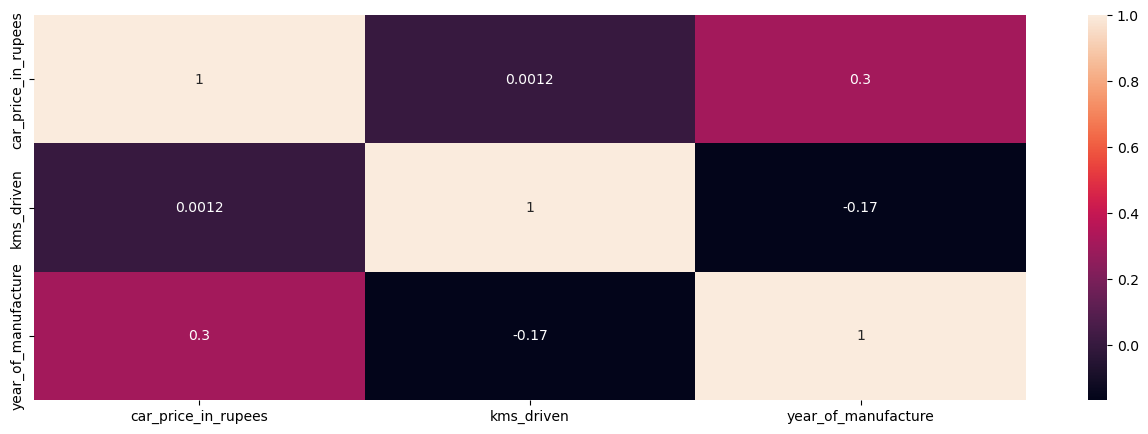

In [16]:
plt.figure(figsize=(16,5))
sns.heatmap(x.corr(),annot=True)
plt.show()


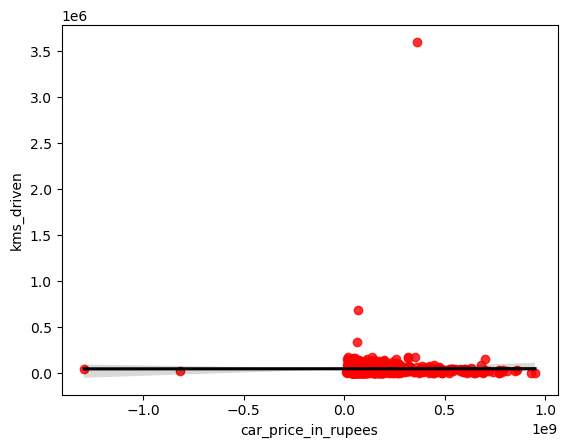

In [17]:
sns.regplot(x='car_price_in_rupees', y='kms_driven', data=df, scatter_kws={"color": 'red'}, line_kws={"color": 'black'})
plt.show()

In [18]:
from sklearn import model_selection 
from sklearn.model_selection import train_test_split


In [19]:
from sklearn import preprocessing
from sklearn .preprocessing import LabelEncoder
label_encoder = preprocessing.LabelEncoder()

df['car_name']=label_encoder.fit_transform(df['car_name'])

In [20]:
df.head()

,car_name,car_price_in_rupees,kms_driven,fuel_type,city,year_of_manufacture
0,276,44500000,22402,Petrol,Mumbai,2016
1,495,29300000,10344,Petrol,Kolkata,2019
2,830,224899999,12999,Diesel,Bangalore,2021
3,559,69500000,45000,Petrol,Thane,2016
4,383,120000000,11193,Petrol,Kolkata,2019


In [21]:
from sklearn import preprocessing
from sklearn .preprocessing import LabelEncoder
label_encoder1=preprocessing.LabelEncoder()
df['fuel_type']=label_encoder1.fit_transform(df['fuel_type'])

In [22]:
df['fuel_type']

0       6
1       6
2       1
3       6
4       6
       ..
2100    1
2101    1
2102    6
2103    6
2104    6
Name: fuel_type, Length: 2105, dtype: int32

In [23]:
label_encoder2=preprocessing.LabelEncoder()
df['city']=label_encoder2.fit_transform(df['city'])

In [24]:
df['city']

0        9
1        8
2        2
3       14
4        8
        ..
2100     8
2101     7
2102     3
2103     9
2104    13
Name: city, Length: 2105, dtype: int32

In [25]:
X=df.drop('car_price_in_rupees',axis=1)
Y=df['car_price_in_rupees']

In [26]:
xtrain,ytrain,xtest,ytest=train_test_split(X,Y,test_size=0.2,random_state=4)

In [27]:
xtrain

,car_name,kms_driven,fuel_type,city,year_of_manufacture
1878,168,20580,6,8,2019
905,628,68183,6,2,2018
1414,305,7432,6,3,2020
1898,239,53864,6,2,2018
1351,204,2293,6,0,2021
...,...,...,...,...,...
456,271,34000,1,15,2017
1921,495,70661,6,13,2015
709,151,52000,6,14,2013
174,130,63956,6,6,2013


In [28]:
from sklearn.linear_model import LinearRegression
clf=LinearRegression()
clf.fit(xtrain,xtest)

LinearRegression()

In [29]:
clf.predict(xtrain)

array([1.15315728e+08, 1.02163788e+08, 1.33784765e+08, ...,
       2.70396929e+07, 4.33547262e+07, 3.71881167e+07])

In [30]:
predicted_price =clf.predict(ytrain)

In [31]:
predicted_price

array([ 8.34359965e+07,  1.20145907e+08,  1.68271566e+08,  1.60648363e+08,
        4.51588081e+07,  1.26698872e+08,  7.20840511e+07,  7.57238874e+07,
        1.58874147e+08,  9.06216662e+07,  9.31423228e+07,  1.55237120e+08,
       -2.12339005e+07,  8.39659069e+07,  9.95650046e+07,  9.14701309e+07,
        3.31320447e+07,  1.81026384e+08,  6.99900334e+07,  1.38168214e+08,
        6.56194999e+07,  1.63210175e+08,  1.30264632e+08,  1.31796741e+08,
        1.04150962e+08,  2.99902980e+07,  1.96689113e+08,  1.78049745e+08,
        1.94398372e+08,  1.29097543e+08,  5.50566659e+07,  6.65271197e+07,
        1.03833643e+08,  1.57331558e+08,  8.91794803e+07,  1.84694387e+08,
        6.19566012e+07,  8.74486240e+07,  1.43270156e+08,  1.74454317e+08,
        6.31270199e+07,  5.52838660e+07,  1.44093890e+08,  9.56413890e+07,
        1.24449247e+08,  1.38802698e+08,  3.79730612e+07,  1.42284537e+08,
        1.93641338e+08,  1.23739430e+08,  1.25328600e+08,  1.84112438e+08,
        1.11354294e+08,  

In [33]:
df['car_name']=label_encoder.inverse_transform(df['car_name'])
df['fuel_type']=label_encoder1.inverse_transform(df['fuel_type'])
df['city']=label_encoder2.inverse_transform(df['city'])

In [37]:
df['car_name']

0       Hyundai Grand i10 Magna 1.2 Kappa VTVT [2017-2...
1                              Maruti Suzuki Alto 800 Lxi
2                                 Tata Safari XZ Plus New
3                                 Maruti Suzuki Ciaz ZXI+
4          Jeep Compass Sport Plus 1.4 Petrol [2019-2020]
                              ...                        
2100                           Ford Figo Titanium1.5 TDCi
2101                      MINI Cooper Countryman Cooper D
2102                            Hyundai Verna 1.6 VTVT SX
2103                           Maruti Suzuki Ciaz VXi+ AT
2104                            Hyundai Verna 1.6 VTVT SX
Name: car_name, Length: 2105, dtype: object

In [35]:
predicted_df=ytrain.copy()

In [36]:
predicted_df

,car_name,kms_driven,fuel_type,city,year_of_manufacture
824,782,31469,6,9,2018
1620,573,51500,6,0,2019
427,100,83000,1,0,2016
1058,806,70930,1,7,2018
275,639,32907,6,4,2014
...,...,...,...,...,...
925,53,61000,1,0,2019
1645,655,18855,6,14,2019
1252,598,88000,6,7,2014
798,512,41617,6,4,2019


In [38]:
predicted_df['car_name']=label_encoder.inverse_transform(predicted_df['car_name'])
predicted_df['fuel_type']=label_encoder1.inverse_transform(predicted_df['fuel_type'])
predicted_df['city']=label_encoder2.inverse_transform(predicted_df['city'])

In [39]:
predicted_df

,car_name,kms_driven,fuel_type,city,year_of_manufacture
824,Skoda Rapid Style 1.6 MPI AT,31469,Petrol,Mumbai,2018
1620,Maruti Suzuki Dzire ZXi AMT,51500,Petrol,Ahmedabad,2019
427,Ford EcoSport Titanium + 1.5L TDCi,83000,Diesel,Ahmedabad,2016
1058,Tata Hexa XTA 4x2 7 STR,70930,Diesel,Hyderabad,2018
275,Maruti Suzuki Wagon R 1.0 LXI,32907,Petrol,Delhi,2014
...,...,...,...,...,...
925,BMW 5 Series 520d Luxury Line [2017-2019],61000,Diesel,Ahmedabad,2019
1645,Maruti Suzuki Wagon R VXi 1.2,18855,Petrol,Thane,2019
1252,Maruti Suzuki Ritz Vxi BS-IV,88000,Petrol,Hyderabad,2014
798,Maruti Suzuki Baleno Delta 1.2,41617,Petrol,Delhi,2019


In [40]:
predicted_df['original_price']=ytest

In [41]:
predicted_df['predicted_price']=predicted_price

In [42]:
predicted_df

,car_name,kms_driven,fuel_type,city,year_of_manufacture,original_price,predicted_price
824,Skoda Rapid Style 1.6 MPI AT,31469,Petrol,Mumbai,2018,87500000,8.343600e+07
1620,Maruti Suzuki Dzire ZXi AMT,51500,Petrol,Ahmedabad,2019,69000000,1.201459e+08
427,Ford EcoSport Titanium + 1.5L TDCi,83000,Diesel,Ahmedabad,2016,69000000,1.682716e+08
1058,Tata Hexa XTA 4x2 7 STR,70930,Diesel,Hyderabad,2018,155000000,1.606484e+08
275,Maruti Suzuki Wagon R 1.0 LXI,32907,Petrol,Delhi,2014,31300000,4.515881e+07
...,...,...,...,...,...,...,...
925,BMW 5 Series 520d Luxury Line [2017-2019],61000,Diesel,Ahmedabad,2019,380000000,2.080250e+08
1645,Maruti Suzuki Wagon R VXi 1.2,18855,Petrol,Thane,2019,53500000,9.003617e+07
1252,Maruti Suzuki Ritz Vxi BS-IV,88000,Petrol,Hyderabad,2014,42500000,4.188008e+07
798,Maruti Suzuki Baleno Delta 1.2,41617,Petrol,Delhi,2019,61800000,1.138982e+08


In [44]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score



In [49]:
ms=mean_squared_error(ytest,predicted_price)

In [51]:
ms

1.4337322242645224e+16

In [50]:
r2=r2_score(ytest,predicted_price)

In [52]:
r2

0.195215836193264

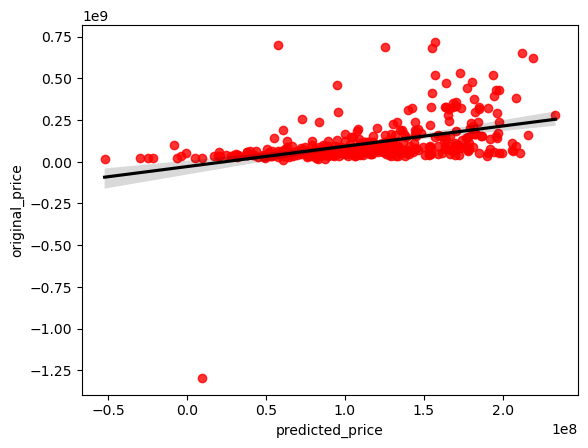

In [56]:
sns.regplot(x='predicted_price', y='original_price', data=predicted_df, scatter_kws={"color": 'red'}, line_kws={"color": 'black'})
plt.show()